In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
#Load Data
data = pd.read_csv('F:/Binar/chalange gold/data.csv', encoding='latin-1')

alay_dict = pd.read_csv('F:/Binar/chalange gold/new_kamusalay.csv',encoding='latin-1',header=None)

alay_dict = alay_dict.rename(columns={0: 'original',
                                     1: 'replacement'})

id_stopword_dict = pd.read_csv('F:/Binar/chalange gold/stopwordbahasa.csv', header=None)
id_stopword_dict = id_stopword_dict.rename(columns={0:'stopword'})

In [3]:
#Text data 
print("Shape: ", data.shape)
data.head(15)

Shape:  (13169, 13)


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,1,1,0,1,0,0,0,0,1,0,1,0
6,deklarasi pilkada 2018 aman dan anti hoax warg...,0,0,0,0,0,0,0,0,0,0,0,0
7,Gue baru aja kelar re-watch Aldnoah Zero!!! pa...,0,1,0,0,0,0,0,0,0,0,0,0
8,Nah admin belanja satu lagi port terbaik nak m...,0,0,0,0,0,0,0,0,0,0,0,0
9,USER Enak lg klo smbil ngewe',0,1,0,0,0,0,0,0,0,0,0,0


In [4]:
data.HS.value_counts()

0    7608
1    5561
Name: HS, dtype: int64

In [5]:
data.Abusive.value_counts()

0    8126
1    5043
Name: Abusive, dtype: int64

In [6]:
print("Toxic Shape: ", data[(data['HS'] == 1) | data['Abusive'] == 1].shape)
print("Non-toxic shape: ", data[(data['HS'] == 0) & (data['Abusive'] == 0)].shape)

Toxic Shape:  (7309, 13)
Non-toxic shape:  (5860, 13)


In [7]:
#Alay Dict
print("Shape: ", alay_dict.shape)
alay_dict.head(15)

Shape:  (15167, 2)


,original,replacement
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali
5,aamiin,amin
6,aamiinn,amin
7,aamin,amin
8,aammiin,amin
9,abis,habis


In [8]:
print("Shape: ", id_stopword_dict.shape)
id_stopword_dict.head()

Shape:  (758, 1)


,stopword
0,ada
1,adalah
2,adanya
3,adapun
4,agak


In [9]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def lowercase(text):
    return text.lower()

def remove_unnecessary_char(text):
    text = re.sub('\n',' ',text) # remove every '\n'
    text = re.sub('rt','',text) # Remove every retweet symbol
    text = re.sub('user','',text) # Remove every username
    text = re.sub('url','',text) # Remove every url
    text = re.sub(';',' ',text) #remove every';'
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)(http?://[^\s]+))',' ',text) # Remove every URL
    text = re.sub(' +',' ',text) #Remove extra spaces
    text = re.sub('\d+\.\s',' ',text) #remove every '\d+\.\s'
    text = re.sub('[,1]{2,}','',text)
    text = re.sub('[,0]{2,}','',text)
    text = re.sub(r'x[a-z0-9][a-z0-9]',' ',text)
    return text
    
def remove_nonaplhanumeric(text):
    text = re.sub(r'[^0-9a-zA-Z]+',' ',text)
    return text

def remove_duplicateexclamation(text):
    text = re.sub(r'[!]{2,}','!',text)
    text = re.sub(r'[\?]{2,}','?',text)
    text = re.sub(r'(! ){2,}','!',text)
    text = re.sub(r'(\? ){2,}','?',text)
    text = re.sub(r',{2,}',',',text)
    text = re.sub(r'\.{2,}',',',text)
    return text
    
alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))
def normalize_alay(text):
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])

def remove_stopword(text):
    text = ' '.join(['' if word in id_stopword_dict.stopword.values else word for word in text.split(' ')])
    text = re.sub(' +',' ',text)
    text = text.strip()
    return text

def stemming(text):
    return stemmer.stem(text)

print("remove_nonalphanumeric: ", remove_nonaplhanumeric("Halooo..,,, dunia!!"))
print("lowercase: ",lowercase("Haloo, dunia!"))
print("stemming: ",stemming("Perekonomian Indonesia Sedang dalam pertumbuhan yang membanggakan"))
print("remove_unnecessary_char: ",remove_unnecessary_char("Hehe\n\n RT USER USER apa kabs www.google.com\n hehe"))
print("normalize_alay: ",normalize_alay("aamiin adek abis 3x"))
print("remove_stopword: ",remove_stopword("ada hehe adalah huhu yang hehe dan hoho"))

remove_nonalphanumeric:  Halooo dunia 
lowercase:  haloo, dunia!
stemming:  ekonomi indonesia sedang dalam tumbuh yang bangga
remove_unnecessary_char:  Hehe RT USER USER apa kabs hehe
normalize_alay:  amin adik habis tiga kali
remove_stopword:  hehe huhu hehe hoho


In [10]:
def preprocess(text):
    text = lowercase(text)
    text = remove_unnecessary_char(text)
    text = remove_nonaplhanumeric(text)
    text = remove_duplicateexclamation(text)
    text = normalize_alay(text)
    text = remove_stopword(text)
    text = stemming(text)
    return text

In [21]:
data['Tweet'] = data['Tweet'].apply(preprocess)


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong


In [22]:
data.head(8)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,cowok usaha lacak perhati gue lantas remeh per...,1,1,1,0,0,0,0,0,1,1,0,0
1,telat tau edan sarap gue gaul cigax jifla cal ...,0,1,0,0,0,0,0,0,0,0,0,0
2,kadang pikir percaya tuhan jatuh kali kali kad...,0,0,0,0,0,0,0,0,0,0,0,0
3,ku tau mata sipit,0,0,0,0,0,0,0,0,0,0,0,0
4,kaum cebong kafir dungu dungu haha,1,1,0,1,1,0,0,0,0,0,1,0
5,ya bani taplak kawan kawan,1,1,0,1,0,0,0,0,1,0,1,0
6,deklarasi pilih kepala daerah 2018 aman anti h...,0,0,0,0,0,0,0,0,0,0,0,0
7,gue selesai re watch aldnoah zero kampret 2 ka...,0,1,0,0,0,0,0,0,0,0,0,0


In [12]:
print("Shape: ", data.shape)
data['Tweet'].head(6)

Shape:  (13169, 13)


0    cowok usaha lacak perhati gue lantas remeh per...
1    telat tau edan sarap gue gaul cigax jifla cal ...
2    kadang pikir percaya tuhan jatuh kali kali kad...
3                                    ku tau mata sipit
4                  kaum cebong kafir dongok dungu haha
5                           ya bani taplak kawan kawan
Name: Tweet, dtype: object

In [13]:
#Save Preprocessed Data
data.to_csv('F:/Binar/chalange gold/clean_tt.csv',index=False)

In [17]:
print("Toxic Shape: ", data[(data['HS'] == 1) | data['Abusive'] == 1].shape)
print("Non-toxic shape: ", data[(data['HS'] == 0) & (data['Abusive'] == 0)].shape)

Toxic Shape:  (7309, 13)
Non-toxic shape:  (5860, 13)


In [27]:
import numpy as np
conditions = [(data['HS_Weak'] == 1),(data['HS_Moderate'] == 1),(data['HS_Strong'] == 1)]

values = ['weak','moderate','strong']
data['level'] = np.select(conditions,values)
data.sample(25)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,level
12754,iya beli cas sih cas cepat habis ya allah beli...,0,0,0,0,0,0,0,0,0,0,0,0,0
10907,manis manis idiot nih orang,1,1,1,0,0,0,1,0,0,1,0,0,weak
10940,thailand negara asia cowok kontol,0,1,0,0,0,0,0,0,0,0,0,0,0
12831,iya tai,0,0,0,0,0,0,0,0,0,0,0,0,0
6290,maki akun akun bilang cari umur no om om enak ...,0,1,0,0,0,0,0,0,0,0,0,0,0
8775,ramai buta mata buta hati salam jumat people,0,0,0,0,0,0,0,0,0,0,0,0,0
3085,tidur ranah najis nyata,0,1,0,0,0,0,0,0,0,0,0,0,0
12708,gue harun yahya ilmuwan yahudi jaman,0,0,0,0,0,0,0,0,0,0,0,0,0
2612,beli album saksi bisu hidup ku,0,0,0,0,0,0,0,0,0,0,0,0,0
28,paai komunis indonesia muncul jelang pilih kep...,1,0,0,1,0,1,0,0,0,0,1,0,moderate


In [58]:
condition2 = [
    (data['HS']==1),
    (data['Abusive']==1)
    (data)
]

values2 = ['hs','abusive']
data['tweet_type'] = np.select(condition2,values2)
data.sample(25)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,level,tweet_type
6831,masuk atm kondom jatuh milik sih empunya buru ...,0,1,0,0,0,0,0,0,0,0,0,0,0,abusive
9477,nyanyi bareng yuk,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5076,lepas politik label antek orde kanan fundament...,1,0,0,1,0,0,0,0,1,0,1,0,moderate,hs
8285,titit ku sakit jebol mulu,0,1,0,0,0,0,0,0,0,0,0,0,0,abusive
10699,idih modar,0,1,0,0,0,0,0,0,0,0,0,0,0,abusive
1336,bani belah otak nya jalan otot usaha suram ala...,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1914,lupa baca bismillah makan islam islam dakwah p...,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4390,runut data kedai kopi median nama kerucut nama...,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1438,ya bom alinea ya bom ter,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12095,sekolah negeri sekolah dasar alami agama data ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
#data['tweet_type'] = np.where((data['HS'] == 1) & (data['Abusive'] == 1), 'both', data['tweet_type'])
data['tweet_type'] = np.where((data['HS'] == 0) & (data['Abusive'] == 0), 'non_toxic', data['tweet_type'])
data.sample(25)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,level,tweet_type
5599,pakai pantat haha pantat teriak pantat rocky g...,1,1,0,1,0,0,0,0,1,0,1,0,moderate,hs
10238,indomatt bawa tas sampah plastik rumah,0,0,0,0,0,0,0,0,0,0,0,0,0,non_toxic
3354,tau pasu nasi bungkus kasihan daerah khusus ko...,0,0,0,0,0,0,0,0,0,0,0,0,0,non_toxic
4054,sian tai,0,0,0,0,0,0,0,0,0,0,0,0,0,non_toxic
7050,alay tai kayak bocah sekolah dasar wkwk,1,1,1,0,0,0,0,0,1,1,0,0,weak,hs
3351,indosiar elang mahkota teknologi grup gembel s...,1,1,0,1,0,0,0,0,1,0,1,0,moderate,hs
11742,gue benci banget lihat orang koar koar spoiler...,1,1,0,1,0,0,0,0,1,0,1,0,moderate,hs
1466,sipit ah,0,0,0,0,0,0,0,0,0,0,0,0,0,non_toxic
696,dosa rumah privasi tuhan pengaruh budaya tuju ...,0,0,0,0,0,0,0,0,0,0,0,0,0,non_toxic
2337,tulis chat,0,0,0,0,0,0,0,0,0,0,0,0,0,non_toxic


In [59]:
print("data abusive dan hs: ", data[(data['HS'] == 1) & data['Abusive'] == 1].shape)
print("data HS", data[(data['HS']==1)].shape)
print("data abusive",data[(data['Abusive']==1)].shape)
print("Non-toxic: ", data[(data['HS'] == 0) & (data['Abusive'] == 0)].shape)

data abusive dan hs:  (3295, 15)
data HS (5561, 15)
data abusive (5043, 15)
Non-toxic:  (5860, 15)


<AxesSubplot:xlabel='tweet_type'>

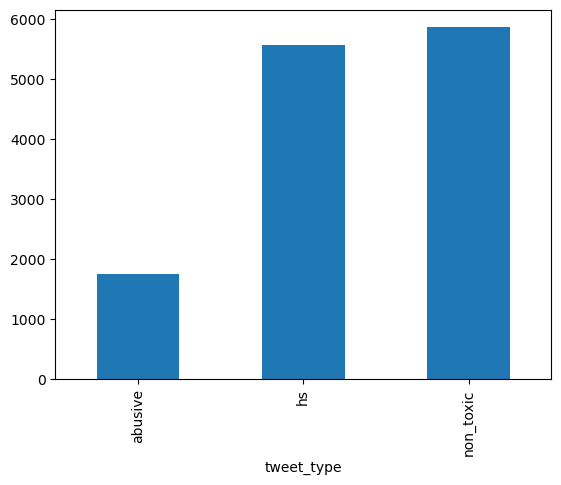

In [62]:
data.groupby('tweet_type').tweet_type.count().plot(kind = 'bar')

In [53]:
#import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
text = ' '.join(data['Tweet'])
wrd = WordCloud().generate(text)

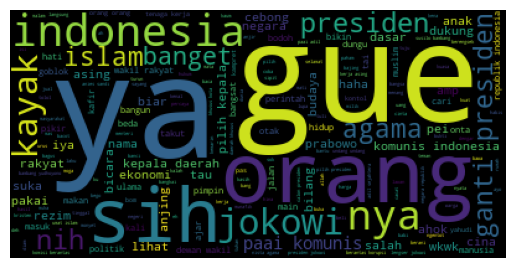

In [54]:
#generate plot
plt.imshow(wrd)
plt.axis("off")
plt.show()